In [1]:
# 데이터 분석 라이브러리
import pandas as pd

# 수치 연산을 수행하는 선형 대수(Linear Algebra) 라이브러리 
import numpy as np

# 난수(Random) 생성
import random

# 시간 계산
from timeit import default_timer as timer

# 그래프 관련 라이브러리  
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
def generate_dataframe(n_rows, n_cols):
    """
    주어진 행과 열의 숫자로 임의의 데이터프레임을 생성하며, 
    이때 각 열의 값은 표준정규분포를 띄는 임의의 수를 가진다.
    """
    # 딕셔너리에서 키(key)는 열 이름, 밸류(value)는 표준정규분포를 띄는 무작위 수이며, 차후 데이터프레임으로 변환.
    random_dataframe = {}

    for col in range(n_cols):
        # 문자열에서 특정 부분을 바꿀 경우 f-string(문자열 포맷팅) 사용 
        # 문자열 앞에 f를 붙여 주고, 중괄호 안에 변수 이름이나 출력하고 싶은 것을 입력 
        col_name = f'col_{col+1}'
        values = np.random.normal(0, 1, n_rows)
        random_dataframe[col_name] = values 

    return pd.DataFrame(random_dataframe)


생성된 데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   col_1   float64
 1   col_2   float64
 2   col_3   float64
 3   col_4   float64
 4   col_5   float64
dtypes: float64(5)
memory usage: 114.4 MB


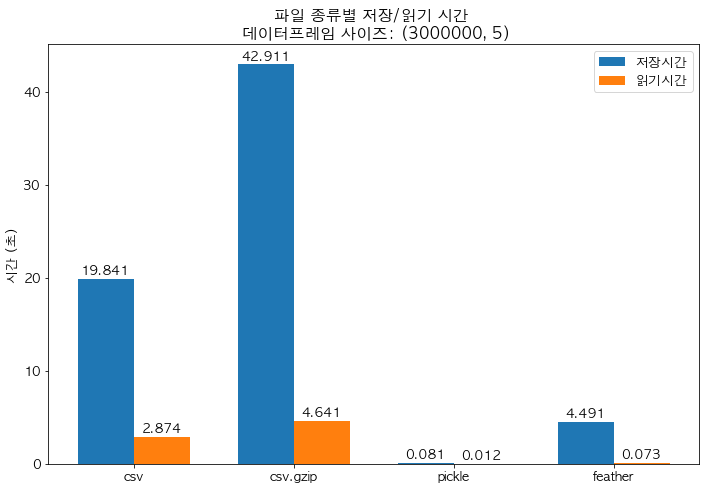

In [9]:
def get_results(n_rows, n_cols):
    """
    1. 주어진 행과 열의 숫자를 입력하면, 표준정규분포를 가진 임의의 데이터프레임 생성 
    2. CSV, CSV.gzip, pickle, feather로 데이터를 저장하고 불러오는 시간 계산 후,
    3. 종류별 소요시간을 그래프로 출력
    """
    # generate_dataframe을 이용해 임의 데이터 생성
    df_sample = generate_dataframe(n_rows, n_cols)

    print("생성된 데이터프레임 정보")
    df_sample.info()

    # 테스트(포맷) 종류
    test_list = ["csv", "csv.gzip", "pickle", "feather"]

    # 테스트마다 데이터를 저장하는 시간, 불러오는 시간을 리스트에 넣을 예정
    # start와 end로 파일 저장 시간 계산 후, test_save_time에 저장 
    test_save_time = [] 
    # start와 end로 파일 읽는 시간 계산 후, test_read_time에 저장 
    test_read_time = []

    # 실험1 : CSV
    start = timer()
    df_sample.to_csv("./results/sample.csv")
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_csv('./results/sample.csv')
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험2 : CSV.gzip 
    start = timer()
    df_sample.to_csv("./results/sample_gzip.csv", compression='gzip')
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_csv('./results/sample_gzip.csv', compression='gzip')
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험3 : Pickle
    start = timer()
    df_sample.to_pickle('./results/sample.pkl')
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_pickle('./results/sample.pkl')
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 실험4 : feather
    start = timer()
    df_sample.to_feather('./results/sample.feather')
    end = timer()
    test_save_time.append(round(end - start, 3))

    start = timer()
    pd.read_feather('./results/sample.feather')
    end = timer()
    test_read_time.append(round(end - start, 3))

    # 그래프 폰트 사이즈 설정
    size = 13
    params = {'figure.figsize' : [10, 7],
                    'legend.fontsize' : size, 
                    'font.size' : size, 
                    'figure.titlesize' : size * 1.3,
                    'axes.labelsize' : size,
                    'xtick.labelsize' : size,
                    'ytick.labelsize' : size}  
    plt.rcParams.update(params)

    # matplotlib 폰트 설정 (MAC OS)
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False 

    x = np.arange(len(test_list))
    width = 0.35 # 바 넓이 
    fig, ax = plt.subplots()

    # 저장 시간과 읽는 시간 - 두 개 막대그래프가 보이도록 설정 
    rects1 = ax.bar(x - width / 2, test_save_time, width, label='저장시간')
    rects2 = ax.bar(x + width / 2, test_read_time, width, label='읽기시간')

    ax.set_title(f'파일 종류별 저장/읽기 시간 \n 데이터프레임 사이즈: {df_sample.shape}')
    ax.set_ylabel("시간 (초)")
    ax.set_xticks(x)
    ax.set_xticklabels(test_list)
    ax.legend()

    # 막대그래프마다 결괏값(시간) 표기 
    def autolabel(rects):
        for rect in rects:
             height = rect.get_height()
             ax.annotate(f'{height}', # 저장/읽기 시간 값
                                    xy = (rect.get_x() + rect.get_width() / 2, height), # 값 위치 
                                    xytext = (0, 4), # 결괏값과 (x, y) 포인트와의 거리
                                    textcoords = "offset points",
                                    ha="center")
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()

    # 그래프 이미지 파일로 저장
    fig.savefig('파일저장읽기시간그래프.png', dpi=200)

# 함수 실행하기 
get_results(3000000, 5)
